# Clustering
The dating profiles

### Importing Libraries and Data

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Loading in the cleaned DF
with open("mechanic_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Loation,Qualification,Specialisation
0,Passionate analyst. Explorer. Hipster-friendly problem solver. Freelance music geek. Social media advocate. Reader.,5,3,1
1,Twitter fanatic. Devoted web fanatic. Zombie evangelist. Travel aficionado. Bacon lover.,5,7,3
2,Total alcohol practitioner. Social media buff. Evil beer expert. Devoted analyst. Problem solver. Student.,2,0,2
3,Extreme twitter advocate. Hardcore internet junkie. Entrepreneur. Friend of animals everywhere.,4,6,6
4,Problem solver. Devoted introvert. Food geek. Avid writer. Thinker. Troublemaker. Friend of animals everywhere.,7,2,8
...,...,...,...,...
6160,Lifelong zombie junkie. Friendly travel buff. Coffeeaholic. Internet enthusiast.,7,5,3
6161,Total introvert. Tv specialist. Pop culture ninja. Web lover. Subtly charming twitter advocate. Explorer.,3,1,8
6162,Friendly zombie specialist. Avid bacon expert. Tv junkie. Alcohol guru. Food aficionado.,6,7,6
6163,Wannabe coffee practitioner. Troublemaker. Communicator. Friendly travel advocate. Reader. Thinker.,7,7,3


## Scaling the Categories

In [20]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Loation,Qualification,Specialisation
0,Passionate analyst. Explorer. Hipster-friendly problem solver. Freelance music geek. Social media advocate. Reader.,0.555556,0.333333,0.111111
1,Twitter fanatic. Devoted web fanatic. Zombie evangelist. Travel aficionado. Bacon lover.,0.555556,0.777778,0.333333
2,Total alcohol practitioner. Social media buff. Evil beer expert. Devoted analyst. Problem solver. Student.,0.222222,0.000000,0.222222
3,Extreme twitter advocate. Hardcore internet junkie. Entrepreneur. Friend of animals everywhere.,0.444444,0.666667,0.666667
4,Problem solver. Devoted introvert. Food geek. Avid writer. Thinker. Troublemaker. Friend of animals everywhere.,0.777778,0.222222,0.888889
...,...,...,...,...
6160,Lifelong zombie junkie. Friendly travel buff. Coffeeaholic. Internet enthusiast.,0.777778,0.555556,0.333333
6161,Total introvert. Tv specialist. Pop culture ninja. Web lover. Subtly charming twitter advocate. Explorer.,0.333333,0.111111,0.888889
6162,Friendly zombie specialist. Avid bacon expert. Tv junkie. Alcohol guru. Food aficionado.,0.666667,0.777778,0.666667
6163,Wannabe coffee practitioner. Troublemaker. Communicator. Friendly travel advocate. Reader. Thinker.,0.777778,0.777778,0.333333


## Vectorizing the Bios

In [21]:
# Instantiating the Vectorizer
vectorizer = TfidfVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [22]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.255961,0.000000,0.000000,0.0,0.0,0.291833,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.282797,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.258258,0.0,0.0,0.0,0.000000,0.268418,0.0
2,0.000000,0.000000,0.215137,0.0,0.0,0.296212,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.246738,0.000000,0.000000,0.0,0.0,0.000000,0.394463,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.352620,0.0,0.239700,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.236773,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.248509,0.0
6161,0.266899,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.218718,0.0,0.0,0.0,0.000000,0.000000,0.0
6162,0.000000,0.275018,0.253790,0.0,0.0,0.000000,0.000000,0.0,0.333068,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.261034,0.0
6163,0.303766,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.337925,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [23]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Loation,Qualification,Specialisation,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.555556,0.333333,0.111111,0.255961,0.000000,0.000000,0.0,0.0,0.291833,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.555556,0.777778,0.333333,0.000000,0.282797,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.258258,0.0,0.0,0.0,0.000000,0.268418,0.0
2,0.222222,0.000000,0.222222,0.000000,0.000000,0.215137,0.0,0.0,0.296212,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.444444,0.666667,0.666667,0.246738,0.000000,0.000000,0.0,0.0,0.000000,0.394463,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.777778,0.222222,0.888889,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.352620,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.236773,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,0.777778,0.555556,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.248509,0.0
6161,0.333333,0.111111,0.888889,0.266899,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.218718,0.0,0.0,0.0,0.000000,0.000000,0.0
6162,0.666667,0.777778,0.666667,0.000000,0.275018,0.253790,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.261034,0.0
6163,0.777778,0.777778,0.333333,0.303766,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.337925,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

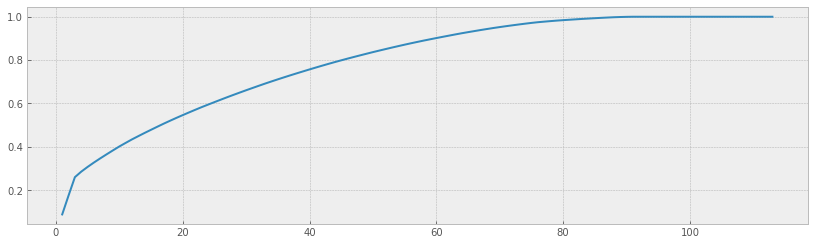

Number features: 83
Total Variance Explained: 0.991641862128988


In [24]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [25]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9899483684782501

# Hierarchical Agglomerative Clustering

Running HAC initially with the PCA DF to test it out

In [26]:
# Instantiating KMeans
hac = AgglomerativeClustering(n_clusters=4)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Setting an evaluation score or metric
print(calinski_harabasz_score(df_pca, cluster_assignments))

114.82374896395855


### Finding the Optimum Number of Clusters

In [27]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

## Plotting the Evaluation Scores for Different Evaluation Metrics

In [28]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric
    """
    
    plt.figure(figsize=(14,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

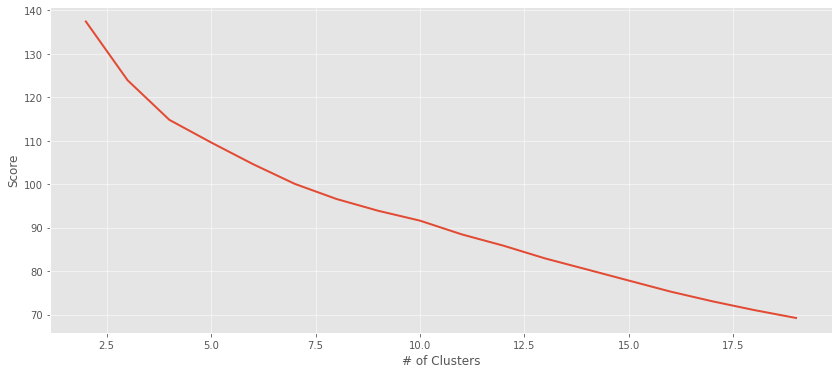

In [29]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

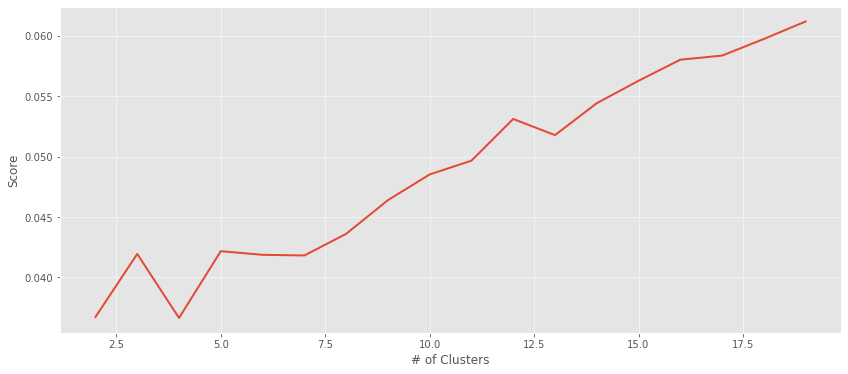

In [30]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

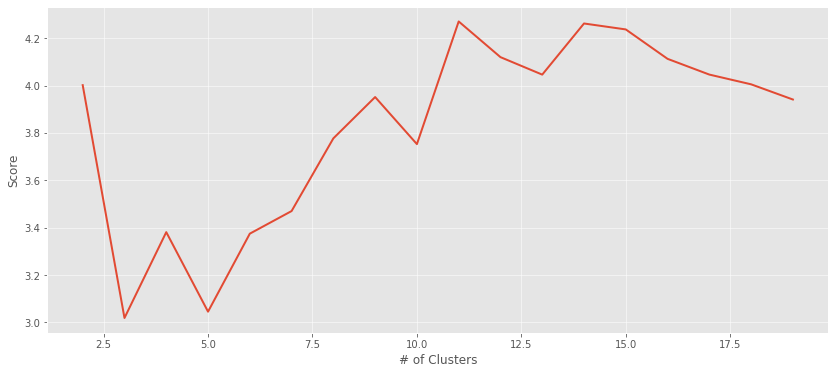

In [31]:
plot_evaluation(db_scores)